# PCA Analysis

In this notebook, we are going to work with the features from the NegsiRNA images, perform a PCA over those features and separate them according to the correspondet stimulus. 

In [1]:
%matplotlib notebook
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

The features have been already calculated, and are stored in a csv file.

In [2]:
negsi_features_path = '../results/NegsiRNA_features.csv'
df_negsi = pd.read_csv(negsi_features_path, index_col=0)
df_negsi

cell_area_ratio  white_area_ratio  e2e_n  e2e_distance_mean  \
NegsiRNA_C3c_CA         0.733850          0.461239      2           2.828427   
NegsiRNA_C3b_CA         0.581828          0.913848     10           2.065685   
NegsiRNA_E3_NO          0.583298          0.893483      0                NaN   
NegsiRNA_L2_NS          0.690188          0.566952      4           9.224874   
NegsiRNA_L1_CA          0.623830          0.842740      2          15.207107   
...                          ...               ...    ...                ...   
NegsiRNA_H2_CA          0.689017          0.747116      3          10.299832   
NegsiRNA_I3_NO          0.590003          0.861740      2           2.500000   
NegsiRNA_I2_CA          0.600133          0.941587      0                NaN   
NegsiRNA_H3_NS          0.608080          0.862938      5          10.028427   
NegsiRNA_E3_CA          0.610193          0.820221      0                NaN   

                 e2e_distance_std  e2e_eu_distance_mean  e2e_eu_distance_std  \
NegsiRNA_C3c_CA          0.000000              2.828427             0.000000   
NegsiRNA_C3b_CA          1.209126              2.047871             1.204724   
NegsiRNA_E3_NO                NaN                   NaN                  NaN   
NegsiRNA_L2_NS          15.898662              8.743313            14.935617   
NegsiRNA_L1_CA          15.849242             15.009612            15.569942   
...                           ...                   ...                  ...   
NegsiRNA_H2_CA          14.899824              9.001932            12.804211   
NegsiRNA_I3_NO           2.121320              2.500000             2.121320   
NegsiRNA_I2_CA                NaN                   NaN                  NaN   
NegsiRNA_H3_NS          20.188177              9.434813            18.860816   
NegsiRNA_E3_CA                NaN                   NaN                  NaN   

                 e2e_distance_ratio_mean  e2e_distance_ratio_std  j2e_n  ...  \
NegsiRNA_C3c_CA                 1.000000                0.000000    213  ...   
NegsiRNA_C3b_CA                 0.992621                0.023335    304  ...   
NegsiRNA_E3_NO                       NaN                     NaN    446  ...   
NegsiRNA_L2_NS                  0.985439                0.029123    367  ...   
NegsiRNA_L1_CA                  0.992523                0.010574    281  ...   
...                                  ...                     ...    ...  ...   
NegsiRNA_H2_CA                  0.930342                0.067686    291  ...   
NegsiRNA_I3_NO                  1.000000                0.000000    386  ...   
NegsiRNA_I2_CA                       NaN                     NaN    507  ...   
NegsiRNA_H3_NS                  0.987135                0.028767    288  ...   
NegsiRNA_E3_CA                       NaN                     NaN    325  ...   

                 j2j_distance_mean  j2j_distance_std  j2j_eu_distance_mean  \
NegsiRNA_C3c_CA          69.758472         55.838049             64.151842   
NegsiRNA_C3b_CA          55.310388         35.628550             51.255141   
NegsiRNA_E3_NO           48.109712         35.494122             44.475891   
NegsiRNA_L2_NS           52.991063         46.097159             48.457418   
NegsiRNA_L1_CA           56.647236         34.425614             52.494589   
...                            ...               ...                   ...   
NegsiRNA_H2_CA           55.008710         33.954309             50.942437   
NegsiRNA_I3_NO           52.290949         37.953111             47.953077   
NegsiRNA_I2_CA           42.572094         32.399391             39.080209   
NegsiRNA_H3_NS           59.548758         39.278796             54.938723   
NegsiRNA_E3_CA           56.363483         41.027360             52.046245   

                 j2j_eu_distance_std  j2j_distance_ratio_mean  \
NegsiRNA_C3c_CA            51.039731                 0.928818   
NegsiRNA_C3b_CA            32.524791                 0.935073   
Ne

Since there are NaN values in the features, those values are replaced with 0

In [3]:
df_negsi_0 = df_negsi.fillna(0)

We are ready to perform the PCA. Also, we must scale the data before the PCA.

In [4]:
negsi_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
negsi_pipe.fit(df_negsi_0)
negsi_pca = negsi_pipe.named_steps['pca']

Visualization of the first and second component for all the data

<IPython.core.display.Javascript object>


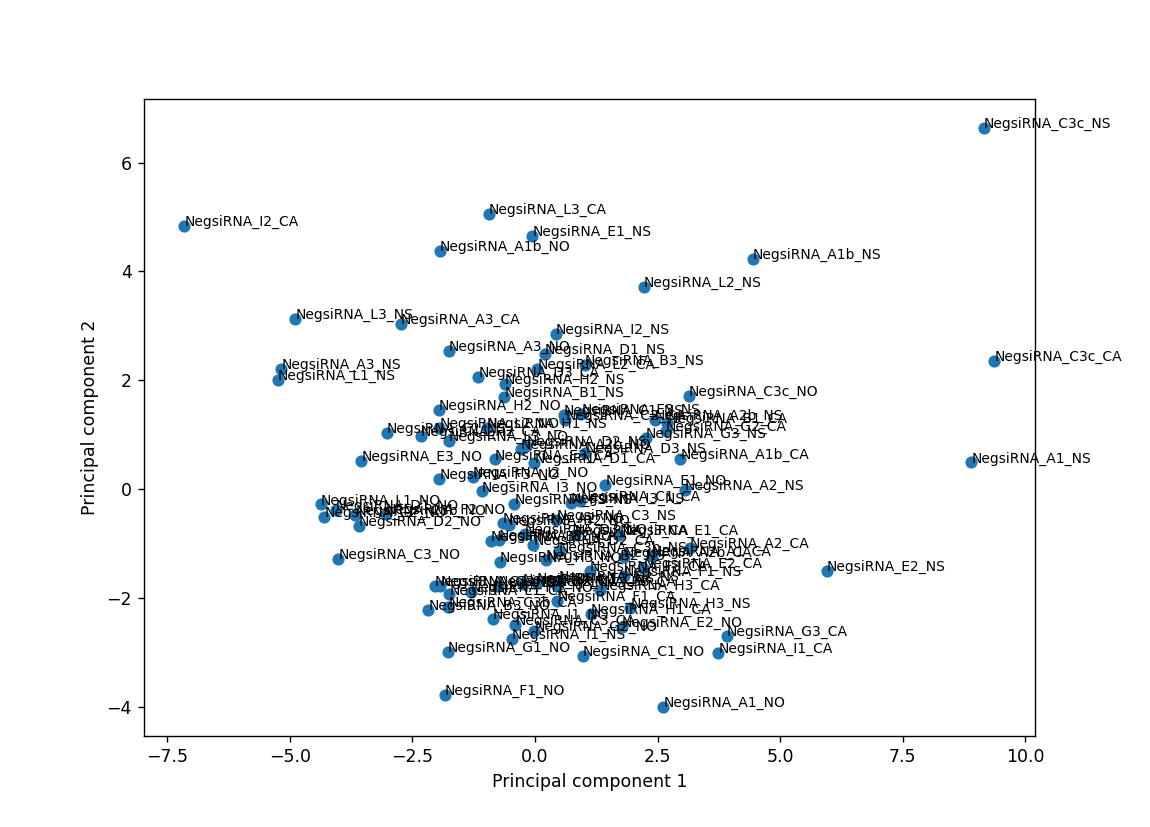

In [5]:
negsi_pca_array = negsi_pipe.transform(df_negsi_0)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(negsi_pca_array[:, 0], negsi_pca_array[:, 1])

labels = list(df_negsi.index)

for index, label in enumerate(labels):
    ax.text(negsi_pca_array[index, 0], negsi_pca_array[index, 1], label, fontsize=8)

Since the previous visualization is a little bit too crowded, it's hard to distinguish each point. So we are going to remove the labels, but each point will be colored according to the correspondant stimulus. 

In [6]:
df_ca = df_negsi_0[df_negsi_0.index.str[-2:] == 'CA']
df_no = df_negsi_0[df_negsi_0.index.str[-2:] == 'NO']
df_ns = df_negsi_0[df_negsi_0.index.str[-2:] == 'NS']
ca_transformed = negsi_pipe.transform(df_ca)
no_transformed = negsi_pipe.transform(df_no)
ns_transformed = negsi_pipe.transform(df_ns)

<IPython.core.display.Javascript object>


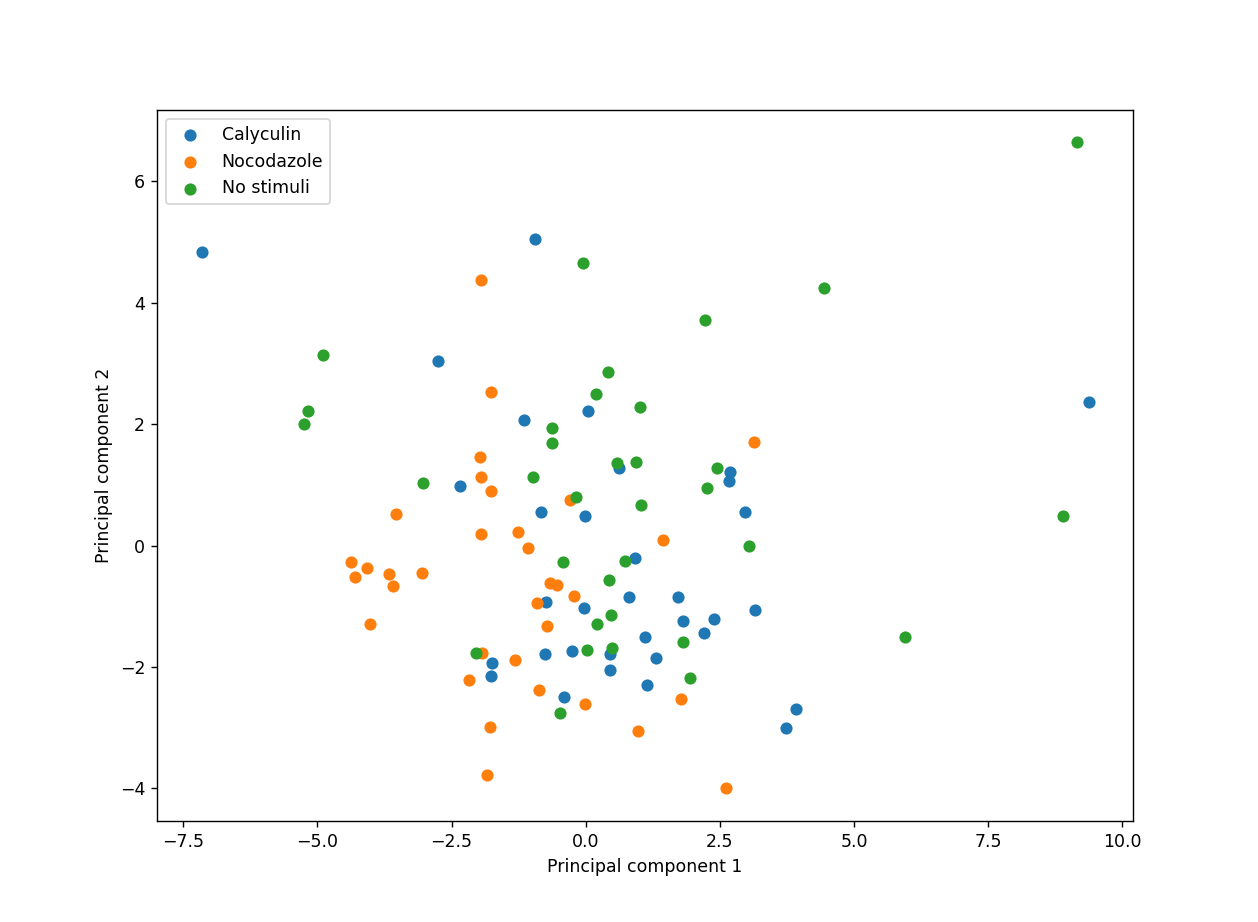

In [7]:
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.scatter(ca_transformed[:, 0], ca_transformed[:, 1], label='Calyculin')
ax.scatter(no_transformed[:, 0], no_transformed[:, 1], label='Nocodazole')
ax.scatter(ns_transformed[:, 0], ns_transformed[:, 1], label='No stimuli')

# Uncomment to print labels
#for index, label in enumerate(df_ca.index):
#    ax.text(ca_transformed[index, 0], ca_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_ns.index):
#    ax.text(ns_transformed[index, 0], ns_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_no.index):
#    ax.text(no_transformed[index, 0], no_transformed[index, 1], label, fontsize=8)
    
ax.legend()

### CA examples

In [8]:
def open_image(imgs_dir, name):
    path = os.path.join(imgs_dir, '{}j.tif'.format(name))
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=5.0)
    contrast_img = clahe.apply(img)
    return contrast_img

<IPython.core.display.Javascript object>


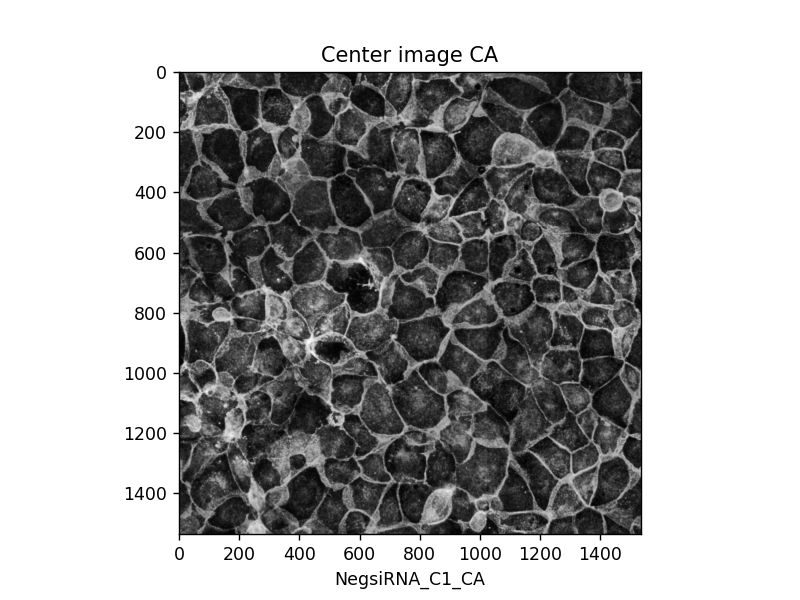

Text(0.5, 0, 'NegsiRNA_C1_CA')

In [9]:
imgs_dir = '../data/NegsiRNA/Original/'
ca_imgs= {'center': 'NegsiRNA_C1_CA', 
          'top_left': 'NegsiRNA_I2_CA',
          'top_right': 'NegsiRNA_C3c_CA',
          'bottom_left': 'NegsiRNA_C3b_CA',
          'bottom_right': 'NegsiRNA_I1_CA'}

plt.imshow(open_image(imgs_dir, ca_imgs['center']), cmap='gray')
plt.title('Center image CA')
plt.xlabel(ca_imgs['center'])

<IPython.core.display.Javascript object>


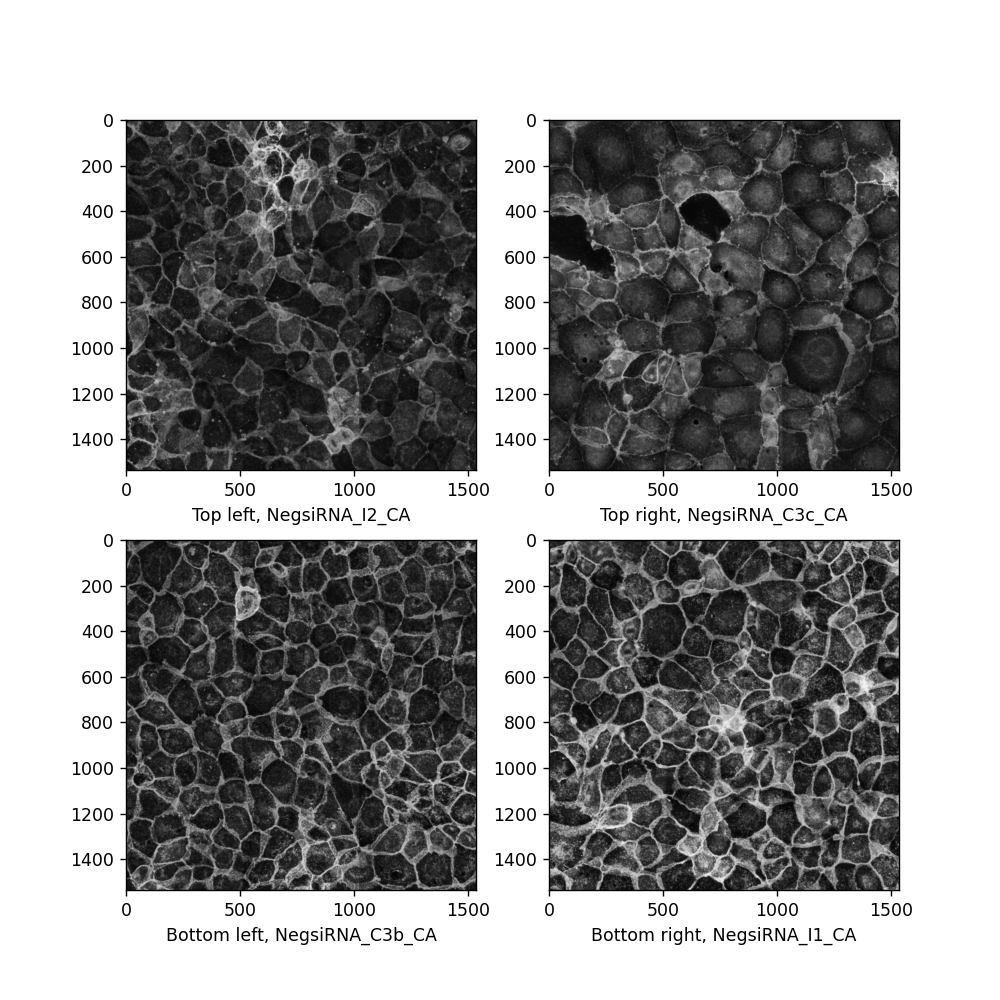

Text(0.5, 0, 'Bottom right, NegsiRNA_I1_CA')

In [10]:
fig, ax = plt.subplots(2,2, figsize=(8, 8))
ax[0,0].imshow(open_image(imgs_dir, ca_imgs['top_left']), cmap='gray')
ax[0,1].imshow(open_image(imgs_dir, ca_imgs['top_right']), cmap='gray')
ax[1,0].imshow(open_image(imgs_dir, ca_imgs['bottom_left']), cmap='gray')
ax[1,1].imshow(open_image(imgs_dir, ca_imgs['bottom_right']), cmap='gray')

ax[0,0].set_xlabel('Top left, {}'.format(ca_imgs['top_left']))
ax[0,1].set_xlabel('Top right, {}'.format(ca_imgs['top_right']))
ax[1,0].set_xlabel('Bottom left, {}'.format(ca_imgs['bottom_left']))
ax[1,1].set_xlabel('Bottom right, {}'.format(ca_imgs['bottom_right']))


### NS examples

<IPython.core.display.Javascript object>


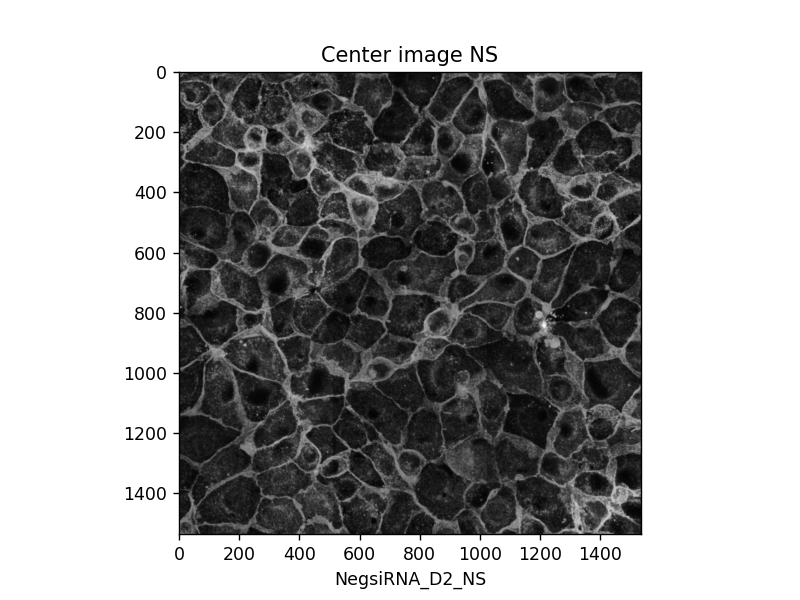

Text(0.5, 0, 'NegsiRNA_D2_NS')

In [11]:
ns_imgs= {'center': 'NegsiRNA_D2_NS', 
          'top_left': 'NegsiRNA_L3_NS',
          'top_right': 'NegsiRNA_C3c_NS',
          'bottom_left': 'NegsiRNA_G1_NS',
          'bottom_right': 'NegsiRNA_E2_NS'}

plt.imshow(open_image(imgs_dir, ns_imgs['center']), cmap='gray')
plt.title('Center image NS')
plt.xlabel(ns_imgs['center'])

<IPython.core.display.Javascript object>


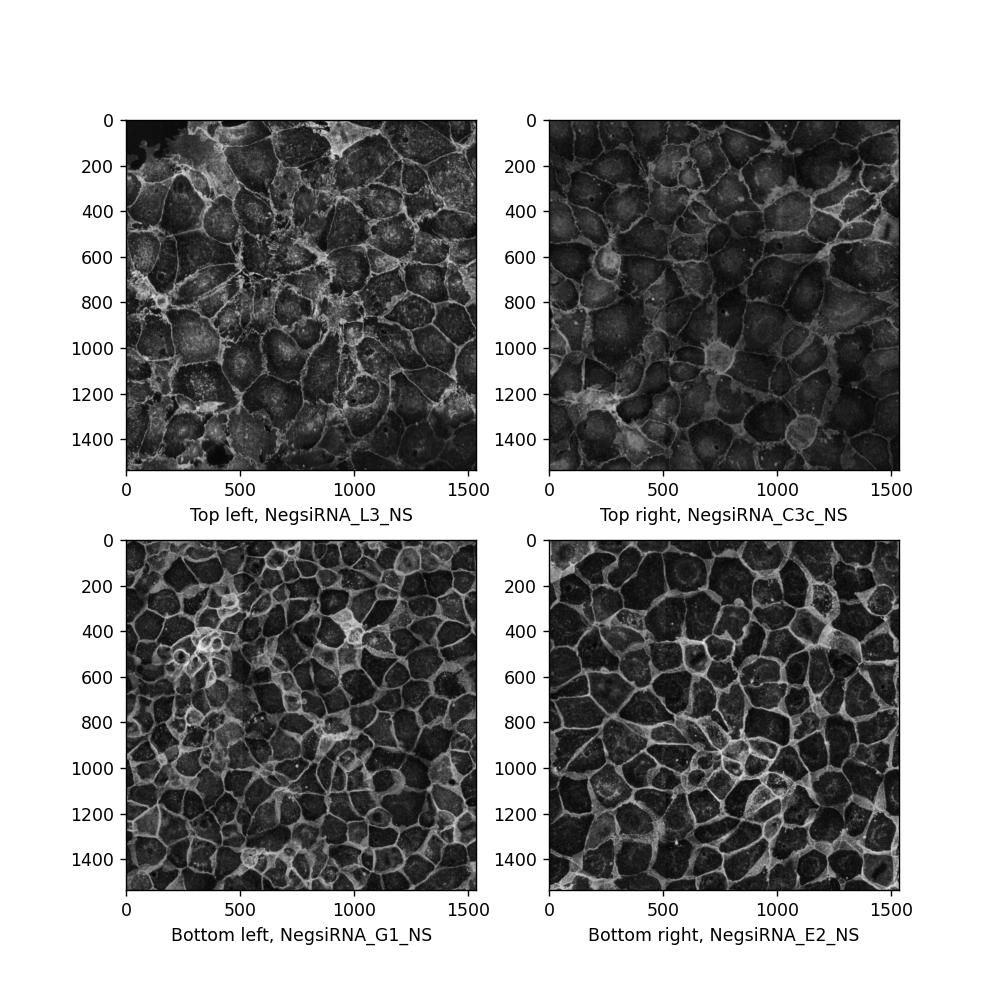

Text(0.5, 0, 'Bottom right, NegsiRNA_E2_NS')

In [12]:
fig, ax = plt.subplots(2,2, figsize=(8, 8))
ax[0,0].imshow(open_image(imgs_dir, ns_imgs['top_left']), cmap='gray')
ax[0,1].imshow(open_image(imgs_dir, ns_imgs['top_right']), cmap='gray')
ax[1,0].imshow(open_image(imgs_dir, ns_imgs['bottom_left']), cmap='gray')
ax[1,1].imshow(open_image(imgs_dir, ns_imgs['bottom_right']), cmap='gray')

ax[0,0].set_xlabel('Top left, {}'.format(ns_imgs['top_left']))
ax[0,1].set_xlabel('Top right, {}'.format(ns_imgs['top_right']))
ax[1,0].set_xlabel('Bottom left, {}'.format(ns_imgs['bottom_left']))
ax[1,1].set_xlabel('Bottom right, {}'.format(ns_imgs['bottom_right']))


### NO examples

<IPython.core.display.Javascript object>


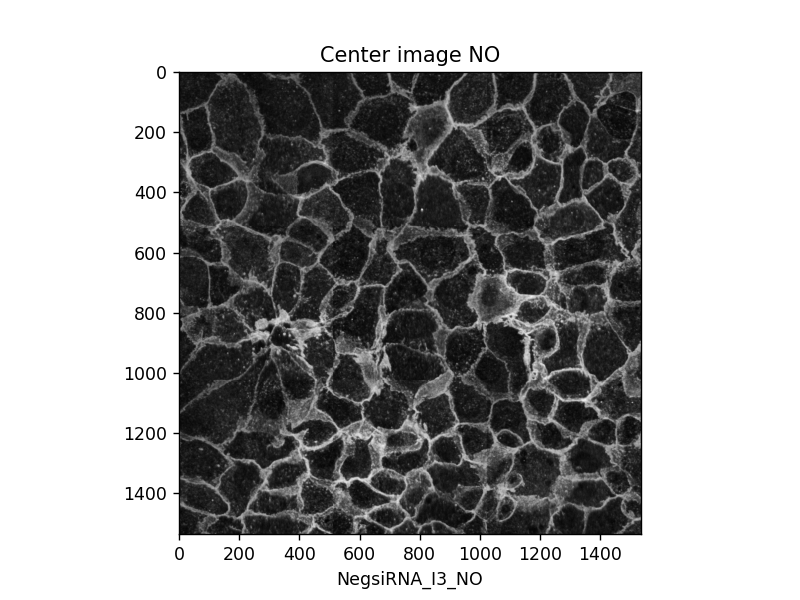

Text(0.5, 0, 'NegsiRNA_I3_NO')

In [13]:
no_imgs= {'center': 'NegsiRNA_I3_NO', 
          'top_left': 'NegsiRNA_A1b_NO',
          'top_right': 'NegsiRNA_C3c_NO',
          'bottom_left': 'NegsiRNA_C3_NO',
          'bottom_right': 'NegsiRNA_A1_NO'}

plt.imshow(open_image(imgs_dir, no_imgs['center']), cmap='gray')
plt.title('Center image NO')
plt.xlabel(no_imgs['center'])

<IPython.core.display.Javascript object>


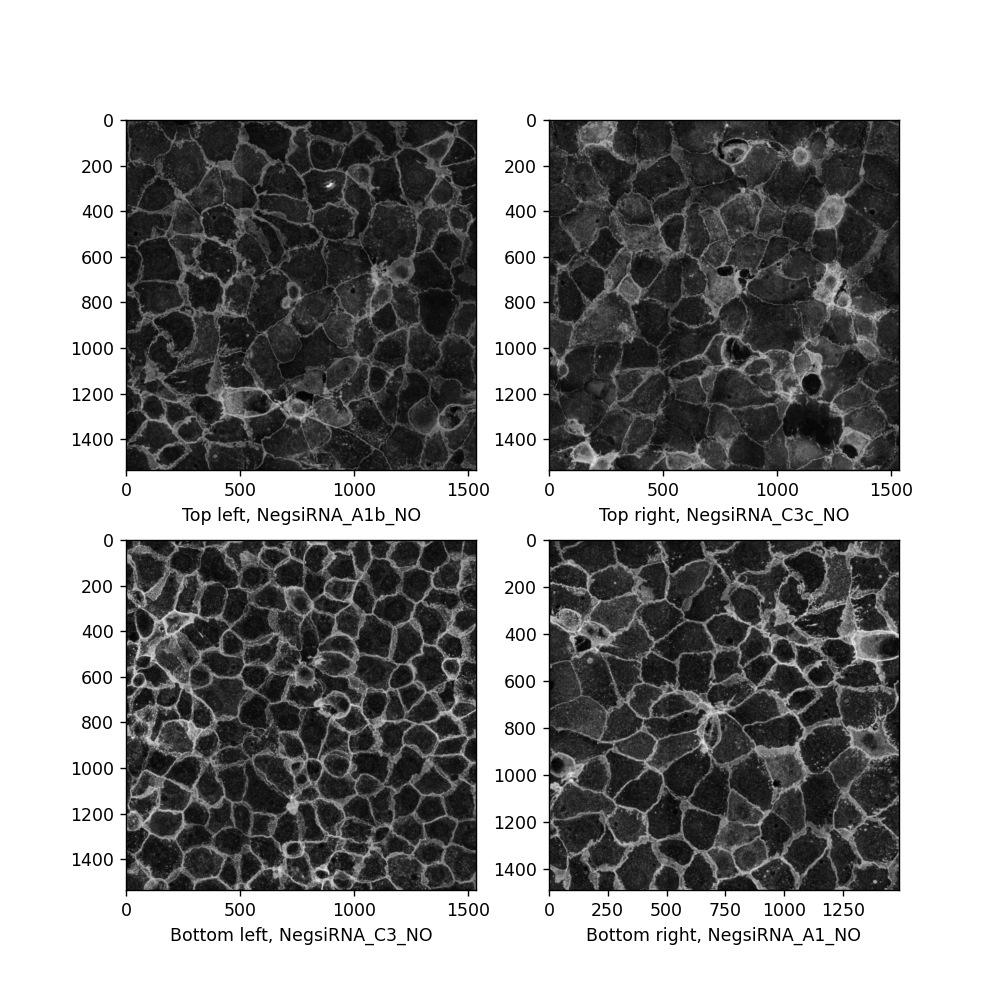

Text(0.5, 0, 'Bottom right, NegsiRNA_A1_NO')

In [14]:
fig, ax = plt.subplots(2,2, figsize=(8, 8))
ax[0,0].imshow(open_image(imgs_dir, no_imgs['top_left']), cmap='gray')
ax[0,1].imshow(open_image(imgs_dir, no_imgs['top_right']), cmap='gray')
ax[1,0].imshow(open_image(imgs_dir, no_imgs['bottom_left']), cmap='gray')
ax[1,1].imshow(open_image(imgs_dir, no_imgs['bottom_right']), cmap='gray')

ax[0,0].set_xlabel('Top left, {}'.format(no_imgs['top_left']))
ax[0,1].set_xlabel('Top right, {}'.format(no_imgs['top_right']))
ax[1,0].set_xlabel('Bottom left, {}'.format(no_imgs['bottom_left']))
ax[1,1].set_xlabel('Bottom right, {}'.format(no_imgs['bottom_right']))


# Classification

The classification will be performed using a SVC with one-vs-rest strategy for multiclass. The response targets are the stimuli (CA, NA, NS) and the input are the features. 

In [15]:
X = df_negsi_0.to_numpy()
y = df_negsi_0.index.map(lambda x: x[-2:])
X.shape, y.shape

((102, 27), (102,))

In [16]:
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [18]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          CA       0.50      0.67      0.57         9
          NO       0.88      0.88      0.88         8
          NS       0.67      0.44      0.53         9

    accuracy                           0.65        26
   macro avg       0.68      0.66      0.66        26
weighted avg       0.67      0.65      0.65        26



<IPython.core.display.Javascript object>


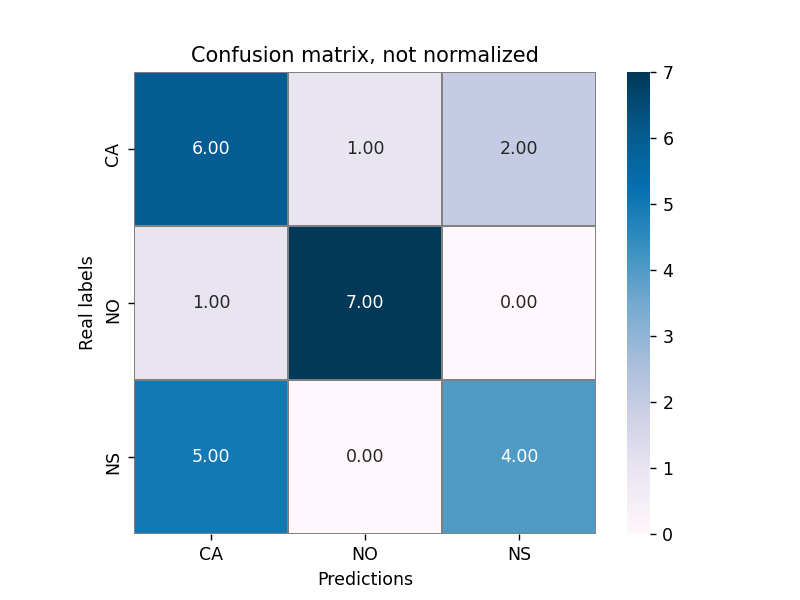

Text(0.5, 1.0, 'Confusion matrix, not normalized')

In [19]:
labels = ['CA', 'NO', 'NS']
cm = confusion_matrix(y_test, preds, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

ax = sns.heatmap(df_cm, square=True, cmap='PuBu', fmt='.2f', annot=True, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')
ax.set_title('Confusion matrix, not normalized')

<IPython.core.display.Javascript object>


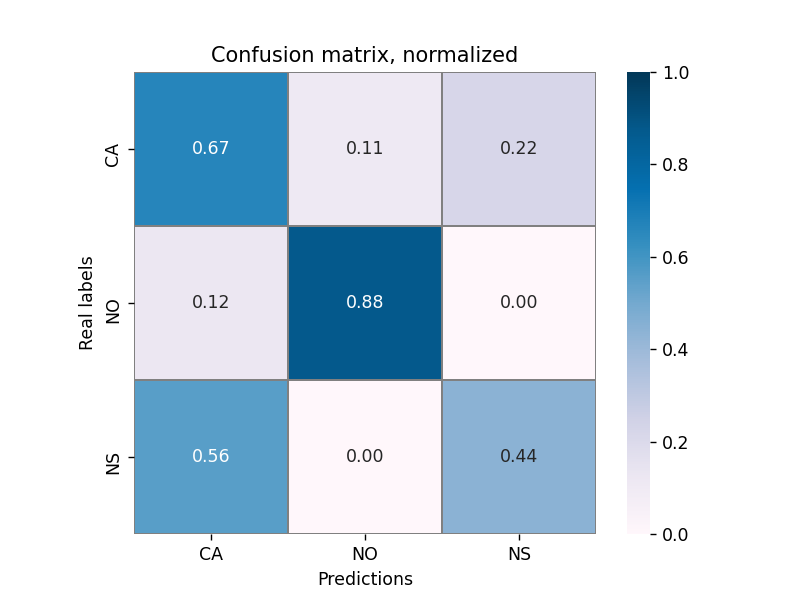

Text(0.5, 1.0, 'Confusion matrix, normalized')

In [20]:
cm_n = cm / cm.sum(axis=1)[:, np.newaxis] # normalización
df_cm_n = pd.DataFrame(cm_n, index=labels, columns=labels)
ax = sns.heatmap(df_cm_n, square=True, cmap='PuBu', fmt='.2f', annot=True, vmin=0, vmax=1, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')
ax.set_title('Confusion matrix, normalized')